In [1]:
#type this into the commandline (make sure you're in the right directory)
#mongoexport --db venmo --collection venmo --type=csv --out notes.csv --fields _id,note
import numpy as np
import pandas as pd
import gensim
from gensim.models import Word2Vec

In [2]:
df = pd.read_csv("notes.csv")

In [3]:
df = df.dropna()

In [4]:
#break the df into chunks
n = 250000  #chunk row size
df_list = [df[i:i+n] for i in range(0,df.shape[0],n)]
df_list[0] #currently I'm going to work on one chunk only

,_id,note
0,ObjectId(5bb7bd386e52181f090becfa),fuk ya
1,ObjectId(5bb7bd386e52181f090becfb),🚗
2,ObjectId(5bb7bd386e52181f090becfc),:venmo_dollar:
3,ObjectId(5bb7bd386e52181f090becfd),Gatorade
4,ObjectId(5bb7bd386e52181f090becfe),🎉
...,...,...
250000,ObjectId(5bb7bed11bed297da90100b4),Letting me try on 7 pairs 😎
250001,ObjectId(5bb7bed11bed297da90100b5),Fight night 🥊
250002,ObjectId(5bb7bed11bed297da90100b6),Big nonsense
250003,ObjectId(5bb7bed11bed297da90100b7),Food


In [5]:
corpus = []
for index, row in df_list[0].iterrows():
    note = row["note"]
    corpus.append(gensim.utils.simple_preprocess(note,min_len=0))

In [6]:
model = Word2Vec(corpus, size=100, window=5, min_count=1, workers=4)

In [49]:
#extract feature vector frome notes
feature_list = []
for index, row in df_list[0].iterrows():
    note = gensim.utils.simple_preprocess(row["note"],min_len=0)
    for word in note:
        feature = []
        feature.append(model.wv[word])
    feature_list.append(np.average(feature,axis=0))

In [50]:
from sklearn.cluster import KMeans
#split the notes into 10 clusters
kmeans = KMeans(n_clusters=10)
kmeans.fit(feature_list)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 8176,
         4: 21560,
         0: 106435,
         8: 49166,
         5: 13287,
         2: 34963,
         3: 5029,
         9: 5448,
         6: 4292,
         7: 1644})

In [52]:
pd.options.mode.chained_assignment = None
df_list[0]["label"] = kmeans.labels_

In [53]:
df_list[0]

,_id,note,label
0,ObjectId(5bb7bd386e52181f090becfa),fuk ya,1
1,ObjectId(5bb7bd386e52181f090becfb),🚗,1
2,ObjectId(5bb7bd386e52181f090becfc),:venmo_dollar:,4
3,ObjectId(5bb7bd386e52181f090becfd),Gatorade,0
4,ObjectId(5bb7bd386e52181f090becfe),🎉,0
...,...,...,...
250000,ObjectId(5bb7bed11bed297da90100b4),Letting me try on 7 pairs 😎,0
250001,ObjectId(5bb7bed11bed297da90100b5),Fight night 🥊,9
250002,ObjectId(5bb7bed11bed297da90100b6),Big nonsense,0
250003,ObjectId(5bb7bed11bed297da90100b7),Food,2


In [54]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
#cluster 5
cluster_5 = ' '
stopwords = set(STOPWORDS)
for index, row in df_list[0].iterrows():
    if row["label"] == 5:
        note = gensim.utils.simple_preprocess(row["note"],min_len=0)
        for word in note:
            cluster_5 = cluster_5 + word + ' '

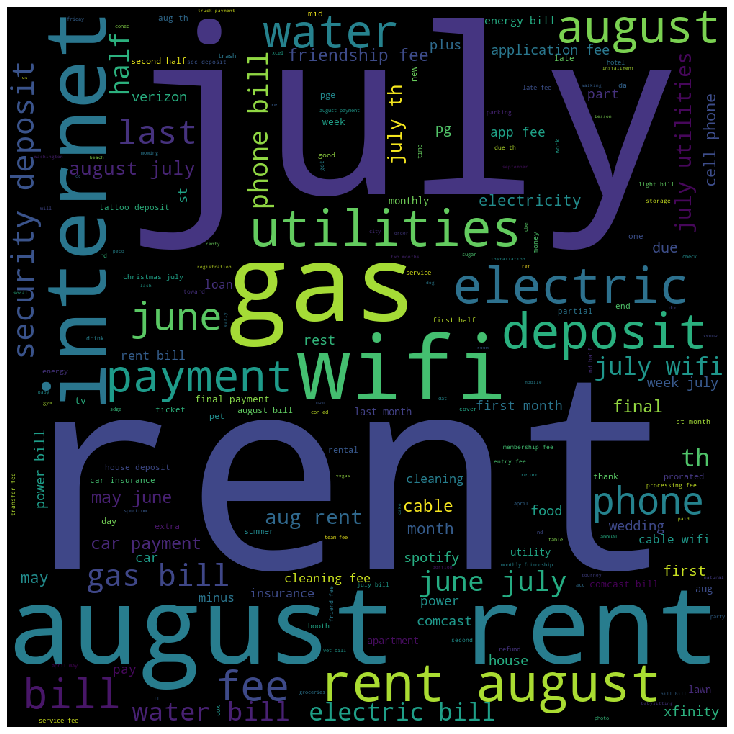

In [63]:
wordcloud = WordCloud(width=1000, height=1000, stopwords = stopwords).generate(cluster_5)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud) 
plt.axis("off")
plt.tight_layout(pad=0)
plt.show() 